# Errores de truncamiento en las series de Taylor





#### Jorge Leonardo López Agredo. Código: 2218061 
#### Eliana Bonalde. Código: 2218065
___

El teorema de Taylor establece que dado un entero positivo $n$, y una función que es derivable al menos $n$ veces con todas sus derivadas contínuas alrededor de $x_0$, el valor de la función en un punto $x$ en la vecindad de $x_0$ se puede expresar como

 $$f(x) = f(x_0) + \sum_{j=0}^{n}\dfrac{f^{(j)}(x_0)}{j!}(x-x_0)^j +\dfrac{f^{(n+1)}(c)}{(n+1)!}(x-x_0)^{n+1}  
$$

para algún valor $c$ entre $x_0$ y $x$. Este resultado puede escribirse de la forma compacta 

$f(x) = P_n(x)+R_n(x).$

El polinomio obtenido al truncar la serie en $n$ términos es llamado **$n$-esímo polinomio de Taylor**  y $R_n$ es el **residuo** o **error de truncamiento**.


In [1]:
import numpy as np
import sympy as sp
from sympy import init_printing
init_printing(use_latex=True)
from sympy.utilities.lambdify import lambdify
#from sympy.plotting import plot
from scipy.interpolate import approximate_taylor_polynomial
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import math 

Considere el polinomio de Taylor $P_3(x)$ de la funciónn $f(x) = e^x \cos(x)$ alrededor de $x = 0$. 

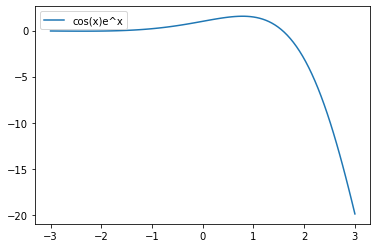

In [3]:
x = np.linspace(-3.0, 3.0, num=100)
y = np.exp(x) * np.cos(x)
plt.plot(x, y, label="cos(x)e^x")
plt.legend()
plt.show()

Podemos crear una función que nos arme la serie de Taylor asociada a la función.

In [4]:
x = sp.Symbol('x')
c = sp.Symbol('c')
y = sp.exp(x) * sp.cos(x) 
#y= sp.exp(-x**2)


'''Serie de Taylor'''
def Taylor(y, n=3, x0=0):
    Pn = 0
    R = 0
    #Calculamos el polinomio de Taylor de grado n, Pn(x)
    for j in np.arange(n+1):
        Pn = Pn + (sp.diff(y,x,j).subs(x,x0) / math.factorial(j)) * (x-x0)**j
    Rn = (sp.diff(y,x,n + 1).subs(x,c) / math.factorial(n + 1)) * (x-x0)**(n+1)
    return(Pn, Rn)

# Polinomio de grado n
n = 3 #definamos el grado del polimonio de Taylor
P3 = Taylor(y, n, 0)
print(P3)

(-x**3/3 + x + 1, -x**4*exp(c)*cos(c)/6)


Sin embargo, actualmente existen librerías que  nos arrojan automáticamente el polinomio.
Simbólicamente, podríamos calcularla como se muestra en la siguiente celda. 

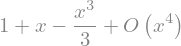

In [5]:
sp.series(y, x, x0=0, n=4)

O conseguir sólo el polinomio de Taylor de grado 3. 

El polinomio de Taylor es:


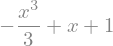

In [6]:
print('El polinomio de Taylor es:')
sp.series(y, x, x0=0, n=4).removeO()

Numéricamente, podríamos calcularla como se muestra en la siguiente celda.  

In [8]:
f = lambda x:np.exp(x) * np.cos(x)
degree = 3
taylor = approximate_taylor_polynomial(f, 0, 3, 1, order=degree + 2)
print(taylor)

         3             2
-0.3361 x - 7.439e-05 x + 1 x + 1


Grafiquemos la función original, junto con la aproximación por medio de los polinomios de Taylor. 

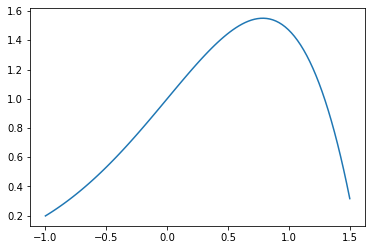

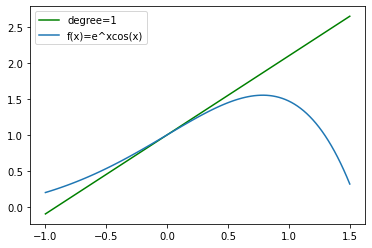

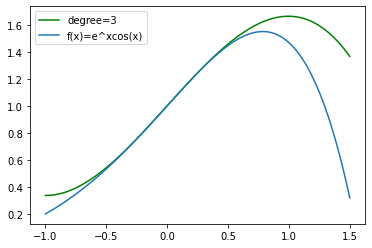

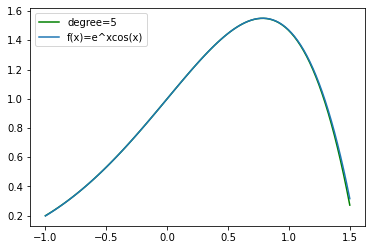

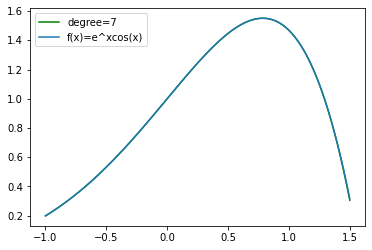

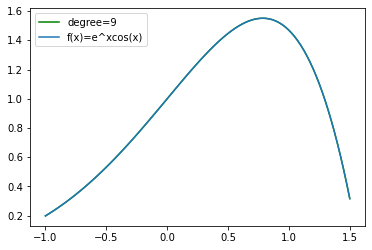

In [9]:
x = np.linspace(-1.0, 1.5, num=100)
plt.plot(x, np.exp(x)*np.cos(x), label="sin curve")
plt.show()

for degree in np.arange(1, 10, step=2):
    taylor = approximate_taylor_polynomial(f, 0, degree, 1, order=degree + 2)
    plt.plot(x, taylor(x), 'g', label=f"degree={degree}")    
    plt.plot(x, f(x), label="f(x)=e^xcos(x)")
    #plt.grid(axis='both')
    plt.legend(loc='best')
    plt.show()

Se observa que a medida que el polinomio sube en grado, éste tiene un mejor ajuste. 

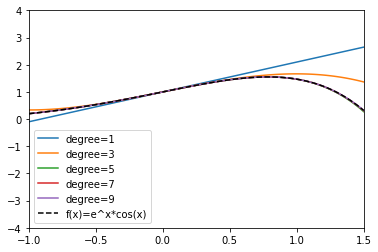

In [10]:
for degree in np.arange(1, 10, step=2):
    taylor = approximate_taylor_polynomial(f, 0, degree, 1, order=degree + 2)
    plt.plot(x, taylor(x), label=f"degree={degree}")    
plt.plot(x, f(x),'k--', label="f(x)=e^x*cos(x)")
#plt.grid(axis='both')
plt.legend(loc='best')
plt.axis([-1.0, 1.5, -4, 4])
plt.show()

Estudiando los errores al integrar la función exacta $f_x$ y el polinomio de $P_nx$ de grado $n$, obtenemos:

# Ejercicios dejados en el Paper *Truncation_error_integrales.pdf*.

Para la función $f(x) = e^x\cos(x)$, resuelva.

1. Utilice $P_3(0,5)$ para aproximar $f(0,5)$. Encuentre un límite superior para el error cometido utilizando la fórmula de $R_3(x)$, y compárelo con el verdadero error cometido.
2. Estime una cota superior al error cometido al aproximar la función por $P_3(x)$ en el intervalo $[0, 1]$. **Hecho en el anexo**.
3. Aproxime $\int_0^1 f(x)dx$  utilizando la aproximación $\int_0^1 P_3(x)dx$.
4. Provea un límite superior al error cometido en la aproximación anterior mediante el cálculo de $\int_0^1 R_3(x)dx$, y compare esta cota al verdadero error cometido. **Hecho en el anexo**.

**Obs:** Los cálculos requeridos para cada uno de estos items, se encuentran presentes en la presentación *Taylor.pptx* anexa. A continuación presentamos los cálculos numéricos.

In [12]:
##Ejercicio 1.
y = sp.exp(x) * sp.cos(x)
a = 0
b = 1
n = 3
x = sp.Symbol('x')
fx = lambdify(x,y)
print('El valor exacto de f(0.5) es: ', fx(0.5))
Pn = Taylor(y, n, 0)[0]
Pnx = lambdify(x, Pn)
print('El valor aproximado P_3(0.5) es: ', Pnx(0.5)) # integral aproximada

# Cuyo error en la aproximación es dado por:
error = np.abs(fx(0.5) - Pnx(0.5))
print('El error en la aproximación de la integral es: ', error)

El valor exacto de f(0.5) es:  1.4468890365841693
El valor aproximado P_3(0.5) es:  1.4583333333333333
El error en la aproximación de la integral es:  0.011444296749163918


In [11]:
## Ejercicio 3.
a = 0
b = 1
n = 3
x = sp.Symbol('x')
fx = lambdify(x,y)
I = integrate.quad(fx, a, b)[0]
print('El valor exacto es: ', I) #integral exacta

Pn = Taylor(y, n, 0)[0]
Pnx = lambdify(x, Pn)
Iaprox = integrate.quad(Pnx, a, b)[0]
print('El valor aproximado es: ', Iaprox) # integral aproximada

# Cuyo error en la aproximación es dado por:
error = np.abs(I - Iaprox)
print('El error en la aproximación de la integral es: ', error)

El valor exacto es:  1.378024613547364
El valor aproximado es:  1.416666666666667
El error en la aproximación de la integral es:  0.03864205311930302


In [106]:
Taylor(y, 3, 0)